# Combining Methods

In [10]:
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

warnings.simplefilter(action='ignore')

In [3]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,X,Y,Class
0,11.971797,-7.504889,3
1,-8.277160,3.589366,2
2,6.159895,-3.174328,3
3,-8.445008,3.845746,2
4,-8.012580,2.902211,2


<Axes: xlabel='X', ylabel='Y'>

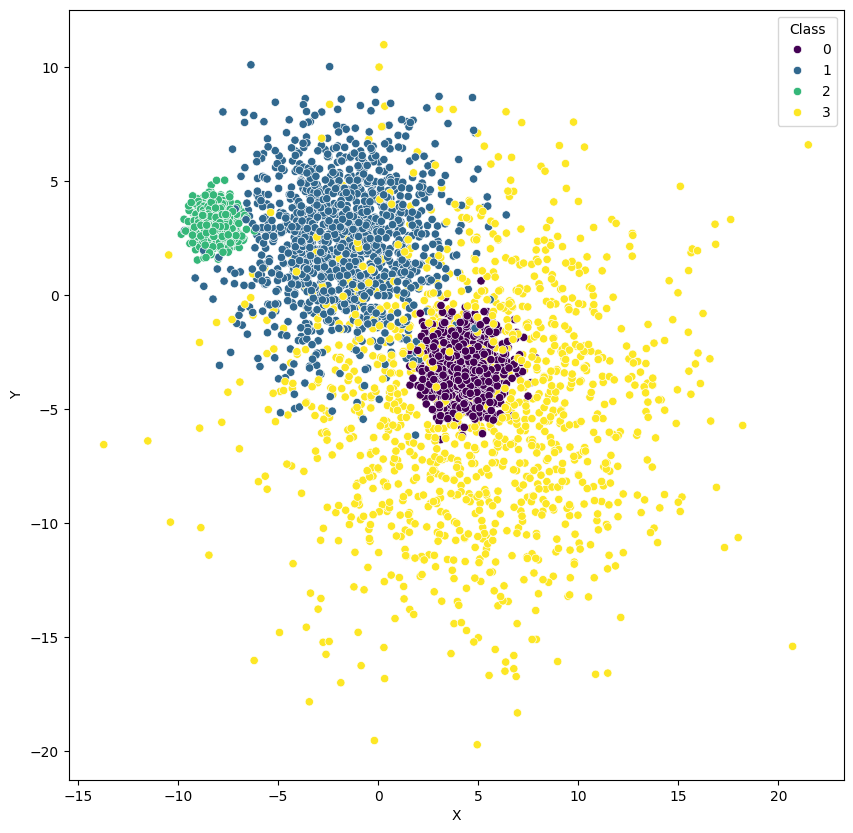

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
sns.scatterplot(data=df, x='X', y='Y', hue='Class', palette='viridis')

In [5]:
import numpy as np
df = pd.read_csv('data.csv')
df.head()
train, test, val = np.split(df.sample(frac=1, random_state=42), [int(.33333 * len(df)), int(.66666 * len(df))])
len(train), len(test), len(val)

(1666, 1667, 1667)

<Axes: xlabel='X', ylabel='Y'>

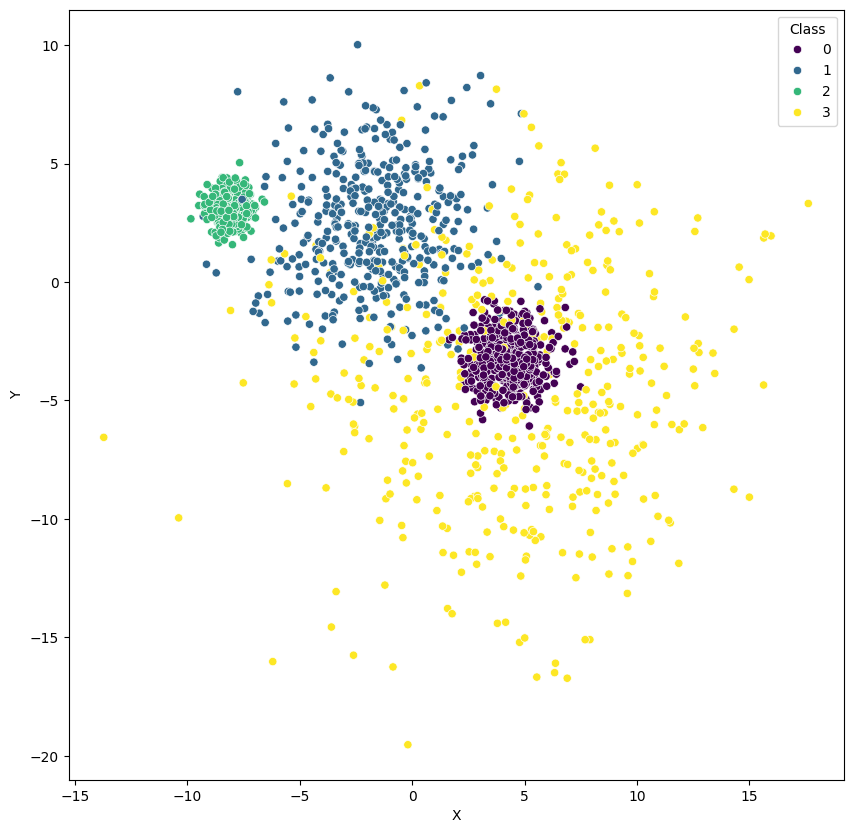

In [6]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data=train, x='X', y='Y', hue='Class', palette='viridis')

In [7]:
df = pd.read_csv('data.csv')
df.head()
train, test, val = np.split(df.sample(frac=1, random_state=42), [int(.33333 * len(df)), int(.66666 * len(df))])
len(train), len(test), len(val)
xTrain = train[['X', 'Y']].values
yTrain = train['Class'].values
xTest = test[['X', 'Y']].values
yTest = test['Class'].values
xVal = val[['X', 'Y']].values
yVal = val['Class'].values

print(xTrain.shape)

(1666, 2)


## Voting Classifiers: Hard vs. Soft Voting

Voting is an ensemble technique used for **classification** tasks where multiple models (base estimators) make predictions, and their outputs are combined to make a final decision.

### 1. Hard Voting (Majority Voting)

**Definition**:  
Each base classifier predicts a class label, and the final prediction is the **class most frequently predicted**.

#### Formula:
Let $( h_1(x), h_2(x), \ldots, h_n(x))$ be the predictions from $( n )$ classifiers.  
The final prediction $( H(x) )$ is:

$$
H(x) = \text{mode} \left( h_1(x), h_2(x), \ldots, h_n(x) \right)
$$

#### Advantages:
- Simple and fast.
- Works with classifiers that **do not support probabilities** (e.g., decision trees without probability calibration).

#### Disadvantages:
- Ignores the **confidence** of predictions.
- Can be **less accurate** if votes are tied or imbalanced.

### 2. Soft Voting (Probability Averaging)

**Definition**:  
Each base classifier estimates **class probabilities**. The final prediction is the class with the **highest average predicted probability**.

#### Formula:
Let $( P_i(y|x) )$ be the probability predicted by classifier \( i \) for class \( y \).  
The final class is:

$$
H(x) = \arg\max_y \left( \frac{1}{n} \sum_{i=1}^n P_i(y|x) \right)
$$

#### ✅ Advantages:
- Takes into account prediction confidence.
- Often more **accurate** than hard voting.
### When to Use What?

- Use **Hard Voting** if:
  - Base models do **not support probabilities**
  - You want a quick ensemble approach

- Use **Soft Voting** if:
  - You have probabilistic classifiers (like Logistic Regression, SVM with `probability=True`)
  - You want better performance and care about confidence



In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = SVC(probability=True)

# Hard Voting
voting_hard = VotingClassifier(estimators=[
    ('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='hard')

# Soft Voting
voting_soft = VotingClassifier(estimators=[
    ('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='soft')

for clf, label in zip([clf1, clf2, clf3, voting_hard, voting_soft],
                      ['LogReg', 'DT', 'SVM', 'Hard Voting', 'Soft Voting']):
    clf.fit(xTrain, yTrain)
    pred = clf.predict(xTest)
    
    print(f"\n🔍 {label}")
    print(f"Accuracy: {accuracy_score(yTest, pred):.2f}")
    
    print("Confusion Matrix:")
    print(confusion_matrix(yTest, pred))
    
    print("Classification Report:")
    print(classification_report(yTest, pred))



🔍 LogReg
Accuracy: 0.82
Confusion Matrix:
[[294   0   0  92]
 [ 22 386  14   2]
 [  0   1 450   0]
 [120  45   0 241]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.72       386
           1       0.89      0.91      0.90       424
           2       0.97      1.00      0.98       451
           3       0.72      0.59      0.65       406

    accuracy                           0.82      1667
   macro avg       0.81      0.82      0.81      1667
weighted avg       0.82      0.82      0.82      1667


🔍 DT
Accuracy: 0.89
Confusion Matrix:
[[344   2   0  40]
 [  1 372   6  45]
 [  0   7 444   0]
 [ 42  48   0 316]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       386
           1       0.87      0.88      0.87       424
           2       0.99      0.98      0.99       451
           3       0.79      0.78      0.78       406

    accurac


## Bagging Classifier Evaluation 
**Bagging (Bootstrap Aggregating)** trains multiple base models on different bootstrapped samples and aggregates their predictions, typically by majority voting.


### Advantages of Bagging:
- Reduces overfitting and variance
- Works well with high-variance, low-bias models like decision trees

### Disadvantages:
- Can be computationally expensive
- Not effective with very stable models (e.g., logistic regression)



In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging.fit(xTrain, yTrain)
ypred = bagging.predict(xTest)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Create and train BaggingClassifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging.fit(xTrain, yTrain)

# Make predictions
ypred = bagging.predict(xTest)

# Evaluation
print("🔍 Bagging Classifier Evaluation")
print(f"Accuracy: {accuracy_score(yTest, ypred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(yTest, ypred))
print("Classification Report:")
print(classification_report(yTest, ypred))


🔍 Bagging Classifier Evaluation
Accuracy: 0.91
Confusion Matrix:
[[363   0   0  23]
 [  0 393   4  27]
 [  0   7 444   0]
 [ 43  52   0 311]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       386
           1       0.87      0.93      0.90       424
           2       0.99      0.98      0.99       451
           3       0.86      0.77      0.81       406

    accuracy                           0.91      1667
   macro avg       0.90      0.90      0.90      1667
weighted avg       0.91      0.91      0.91      1667




## AdaBoost Classifier (Adaptive Boosting)

**Idea**: AdaBoost builds a strong classifier by combining many weak classifiers (often decision stumps), focusing more on the data points that previous classifiers misclassified.


###  Algorithm Intuition:

1. **Initialize** equal weights for all training samples.
2. **Iteratively** train weak classifiers:
    - After each round, increase the weight of **misclassified samples**.
    - Focus the next weak learner on these harder examples.
3. **Aggregate** the weak classifiers into a final strong model:
    - Use a **weighted vote** where better classifiers get more say.

### Mathematical Description:

Let $(x_1, y_1), \ldots, (x_N, y_N)$ be training data with $y_i \in \{-1, +1\}$.

- Initialize sample weights: $w_1(i) = \frac{1}{N}$

- For $t = 1, \ldots, T$:
    1. Train weak learner $h_t(x)$ using weights $w_t(i)$
    2. Compute weighted error:
       $$
       \varepsilon_t = \sum_{i=1}^N w_t(i) \cdot \mathbb{1}[h_t(x_i) \neq y_i]
       $$
    3. Compute classifier weight:
       $$
       \alpha_t = \frac{1}{2} \ln \left(\frac{1 - \varepsilon_t}{\varepsilon_t}\right)
       $$
    4. Update sample weights:
       $$
       w_{t+1}(i) = w_t(i) \cdot e^{-\alpha_t y_i h_t(x_i)}
       $$
    5. Normalize weights to sum to 1

- Final prediction:
   $$
   H(x) = \text{sign} \left( \sum_{t=1}^T \alpha_t h_t(x) \right)
   $$

### Pros:
- Often significantly improves accuracy.
- Works well with weak learners like decision stumps.
- Adaptive: focuses on hard examples.

### Cons:
- Sensitive to noise and outliers.
- Sequential nature means less parallelism and slower training.


In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada = AdaBoostClassifier()
ada.fit(xTrain, yTrain)

AdaBoostClassifier()

<Figure size 1000x1000 with 0 Axes>

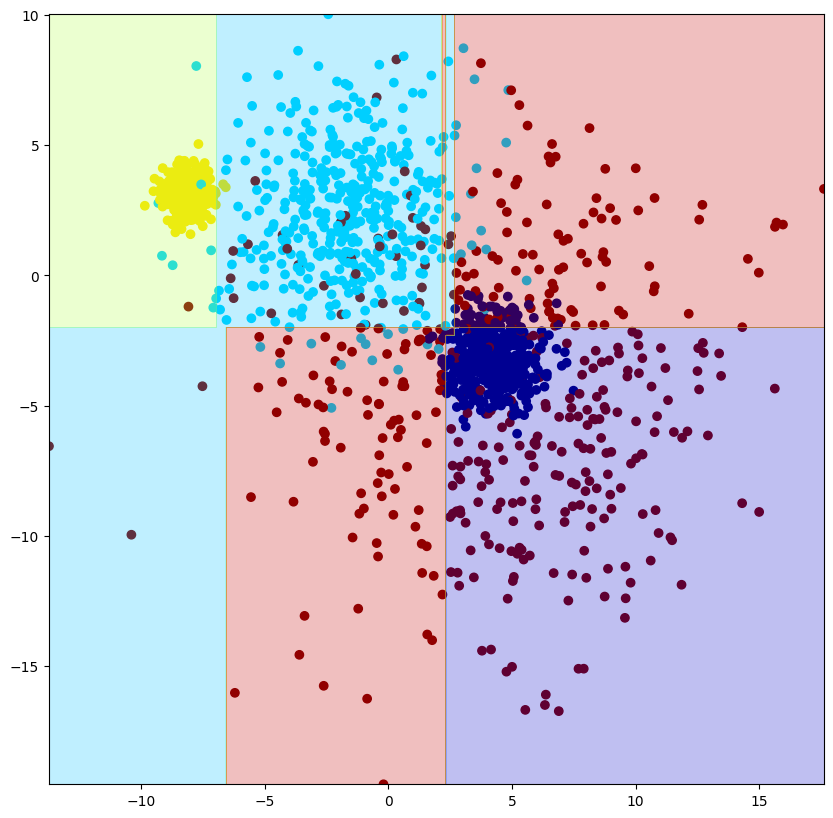

In [14]:
plt.figure(figsize = (10, 10))

fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(train['X'], train['Y'], c=yTrain, cmap='jet')

X, Y = np.meshgrid(np.linspace(train['X'].min(), train['X'].max(), 1000), 
            np.linspace(train['Y'].min(), train['Y'].max(), 1000))

# ravel flattens, c_ combines into matrix
Z = ada.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

ax.contourf(X, Y, Z, cmap='jet', alpha=0.25)

In [16]:
from sklearn import metrics
from sklearn import model_selection

In [17]:
adaPred = ada.predict(xTest)
adaProb = ada.predict_proba(xTest)

print("Accuracy:",metrics.balanced_accuracy_score(yTest, adaPred))
print("F1:", metrics.f1_score(yTest, adaPred, average='weighted'))
print("Loss:", metrics.log_loss(yTest, adaProb))
print("Cross validation:", model_selection.cross_val_score(ada, df[['X', 'Y']], df['Class']))

print(metrics.classification_report(yTest, adaPred))

Accuracy: 0.786470913838865
F1: 0.782081643383624
Loss: 1.8332826553887627
Cross validation: [0.784 0.764 0.781 0.744 0.774]
              precision    recall  f1-score   support

           0       0.61      0.85      0.71       386
           1       0.90      0.90      0.90       424
           2       0.99      0.99      0.99       451
           3       0.64      0.40      0.49       406

    accuracy                           0.79      1667
   macro avg       0.79      0.79      0.77      1667
weighted avg       0.79      0.79      0.78      1667



In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

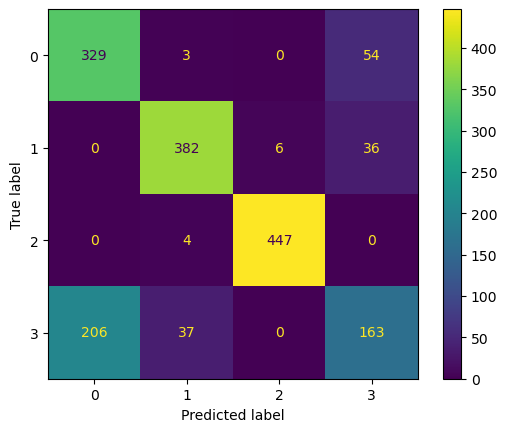

In [12]:
cm = confusion_matrix(yTest, adaPred, labels=ada.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot()

plt.show()

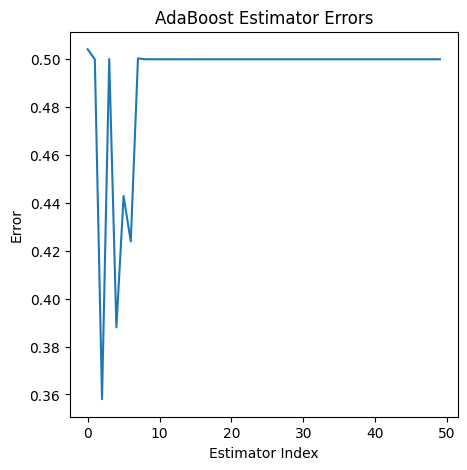

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
ax = sns.lineplot(x=np.arange(len(ada.estimator_errors_)), y=ada.estimator_errors_)
ax.set(xlabel='Estimator Index', ylabel='Error')
plt.title("AdaBoost Estimator Errors")
plt.show()


### AdaBoost Estimator Errors

The plot shows the training error of each weak learner (estimator) in the AdaBoost ensemble.

- **X-axis**: Estimator index (boosting round).
- **Y-axis**: Weighted training error for each estimator.

#### Interpretation:
- Initial estimators vary in error.
- After a certain point (around index 10), errors plateau near \( 0.5 \), indicating that further learners are no better than random guessing.

#### Problem:
Later estimators do not improve performance — AdaBoost is saturating.

#### Solution:
To overcome this:
- Use a **stronger base learner** (e.g., deeper trees).
- **Reduce noise** in training data.
- Consider **fewer estimators** to avoid redundancy.


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define a deeper decision tree as the base learner
base = DecisionTreeClassifier(max_depth=6)

# Use 'estimator' instead of 'base_estimator'
ada = AdaBoostClassifier(estimator=base, n_estimators=100)
ada.fit(xTrain, yTrain)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=6),
                   n_estimators=100)

In [70]:
adaPred = ada.predict(xTest)
adaProb = ada.predict_proba(xTest)


print("Loss:", metrics.log_loss(yTest, adaProb))
print("Cross validation:", model_selection.cross_val_score(ada, df[['X', 'Y']], df['Class']))

print(metrics.classification_report(yTest, adaPred))

Loss: 0.4338378064704664
Cross validation: [0.886 0.882 0.9   0.888 0.892]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       386
           1       0.88      0.89      0.88       424
           2       0.99      0.99      0.99       451
           3       0.82      0.79      0.81       406

    accuracy                           0.90      1667
   macro avg       0.90      0.90      0.90      1667
weighted avg       0.90      0.90      0.90      1667



<Figure size 1000x1000 with 0 Axes>

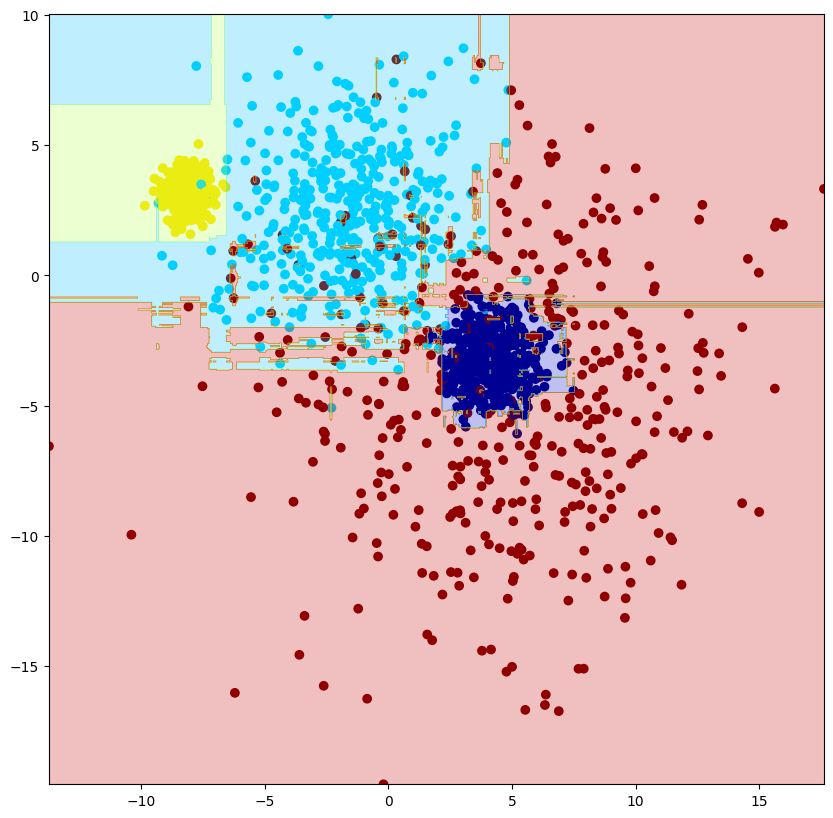

In [58]:
plt.figure(figsize = (10, 10))

fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(train['X'], train['Y'], c=yTrain, cmap='jet')

X, Y = np.meshgrid(np.linspace(train['X'].min(), train['X'].max(), 1000), 
            np.linspace(train['Y'].min(), train['Y'].max(), 1000))

# ravel flattens, c_ combines into matrix
Z = ada.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

ax.contourf(X, Y, Z, cmap='jet', alpha=0.25)

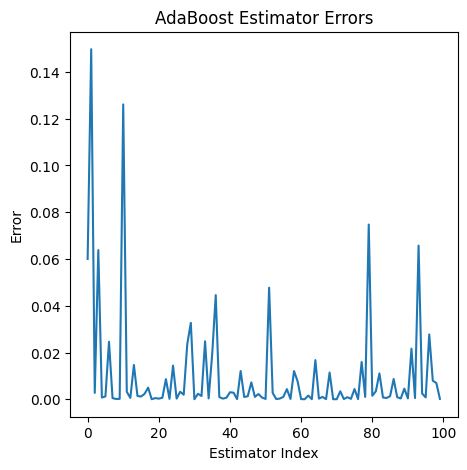

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
ax = sns.lineplot(x=np.arange(len(ada.estimator_errors_)), y=ada.estimator_errors_)
ax.set(xlabel='Estimator Index', ylabel='Error')
plt.title("AdaBoost Estimator Errors")
plt.show()


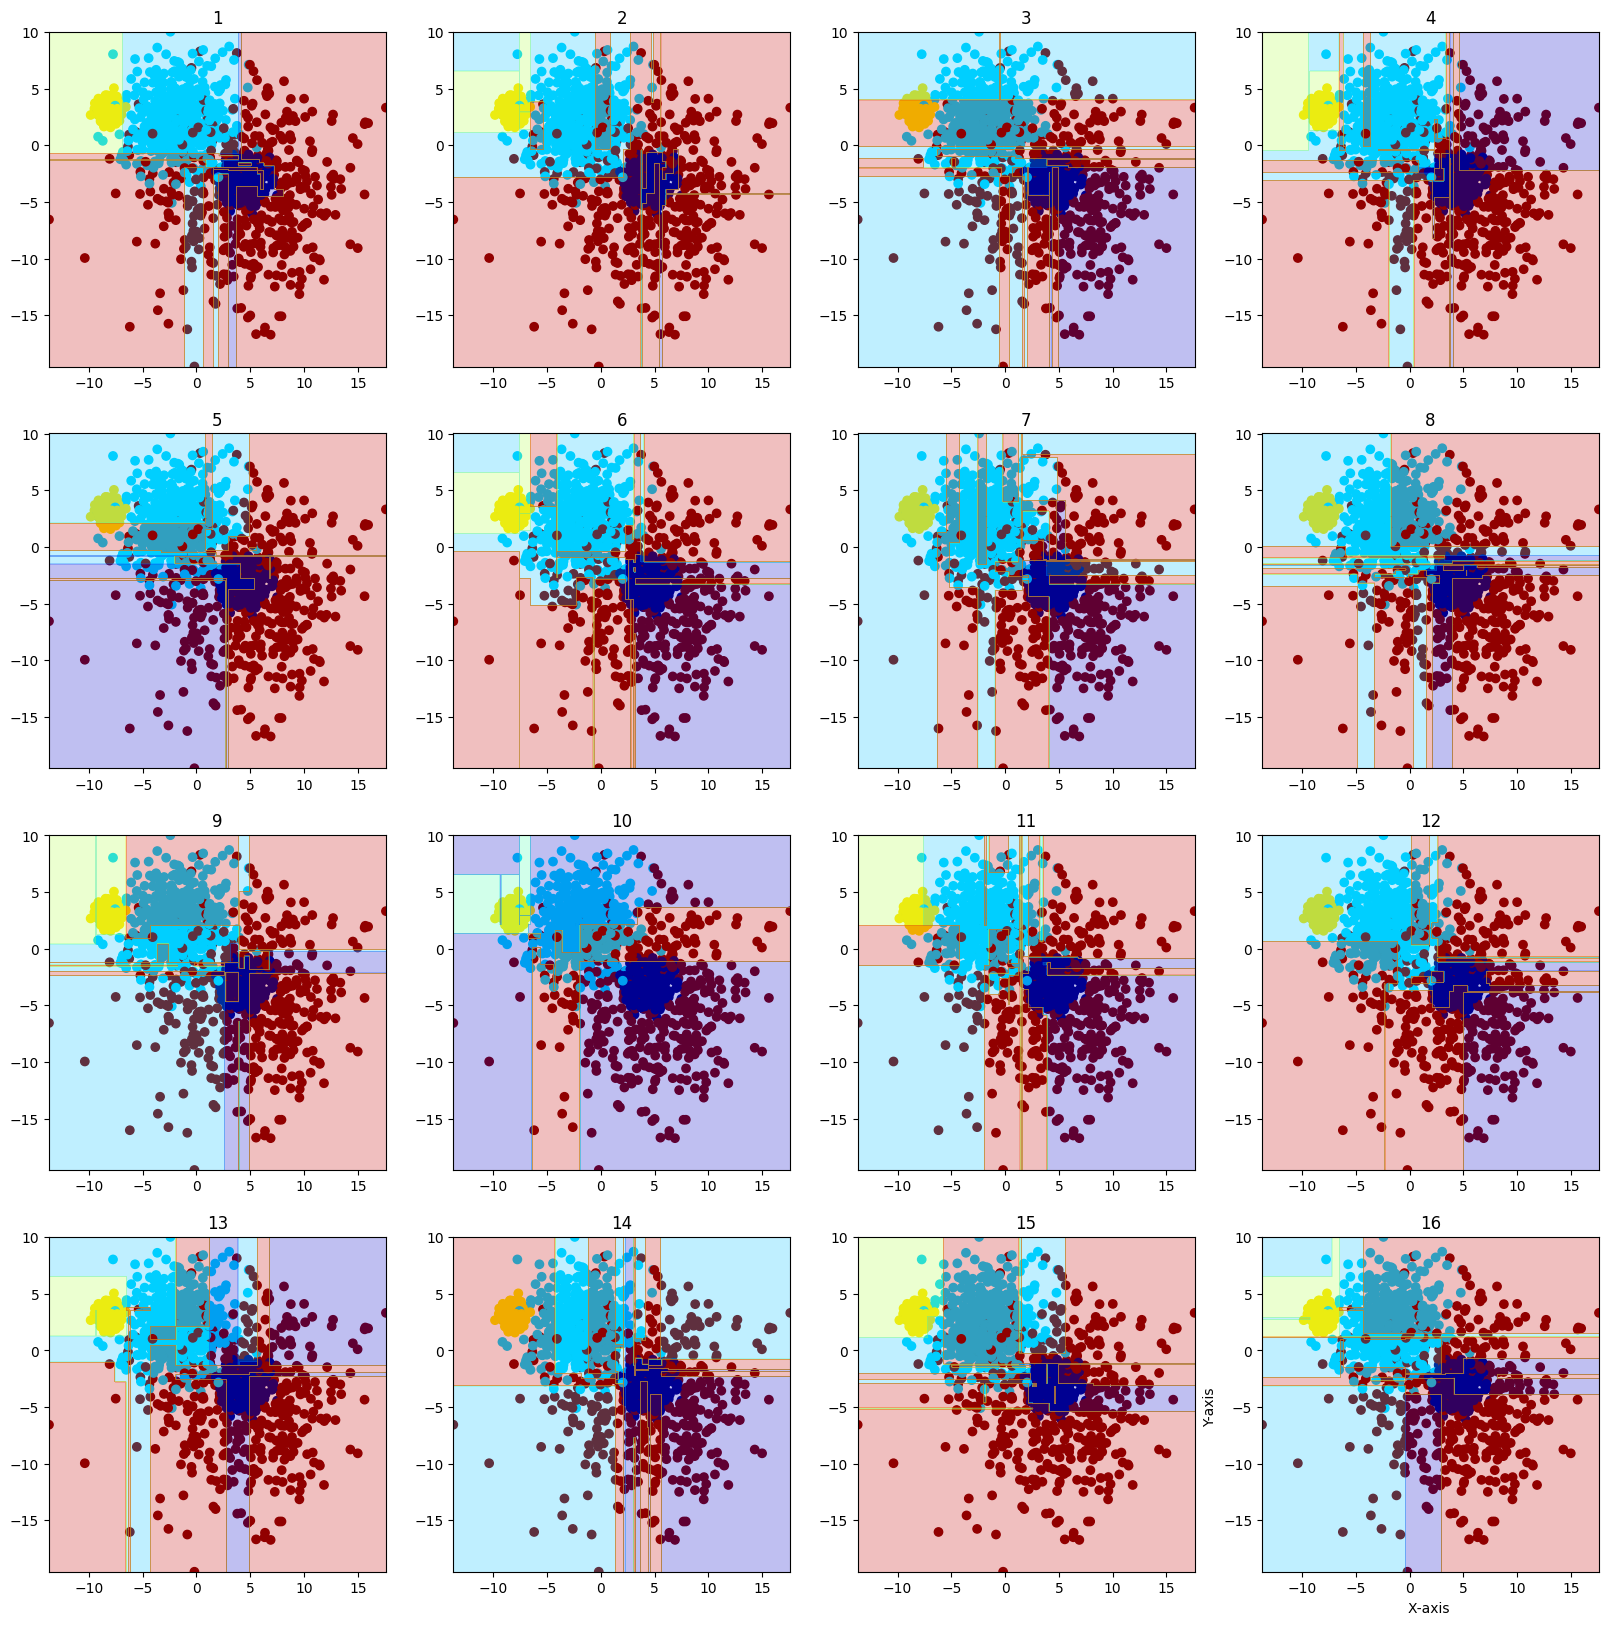

In [72]:
fig, axs = plt.subplots(4, 4, figsize = (20, 20))
for i in range (1,5):
     for j in range (1,5):
            tree=4*(i-1)+(j-1)+1

            axs[i-1, j-1].scatter(train['X'], train['Y'], c=yTrain, cmap='jet')

            X, Y = np.meshgrid(np.linspace(train['X'].min(), train['X'].max(), 1000), 
                np.linspace(train['Y'].min(), train['Y'].max(), 1000))

            Z = ada.estimators_[tree].predict(np.c_[X.ravel(), Y.ravel()])
            Z = Z.reshape(X.shape)

            axs[i-1, j-1].contourf(X, Y, Z, cmap='jet', alpha=0.25)
            axs[i-1, j-1].set_title(tree)

            plt.xlabel('X-axis ')
            plt.ylabel('Y-axis ')

plt.show()

# Stacking

**Stacking** is an ensemble learning technique that combines multiple base models (level-0 models) and a meta-model (level-1) to make a final prediction. Unlike voting, stacking **learns how to best combine** the base models.

---

###  How It Works:

1. **Train base models** (e.g., Logistic Regression, Decision Tree, SVM) on the training data.
2. **Generate predictions** (via cross-validation) from these models on a validation set.
3. **Train a meta-learner** (e.g., another Logistic Regression) on these predictions to learn how to combine them.
4. For new data, the base models make predictions, and the meta-learner makes the final prediction.

---

###  Final Prediction:
Let base learners output:
$$
h_1(x), h_2(x), \ldots, h_n(x)
$$
The meta-learner learns a function:
$$
H(x) = f(h_1(x), h_2(x), \ldots, h_n(x))
$$


### Advantages:
- Learns how to best combine models
- Can outperform base models
- Allows mixing of different types of classifiers

###  Disadvantages:
- More complex and slower to train
- Needs careful validation to avoid overfitting

### Example:
Like consulting multiple specialists (e.g., heart doctor, neurologist), and having a general physician combine their opinions for the final diagnosis.


In [97]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define base and meta learners
base_learners = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]

meta_learner = DecisionTreeClassifier()

from sklearn.model_selection import StratifiedKFold
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define Stacking Classifier
stack = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stack.fit(xTrain, yTrain)

# Predict and evaluate
y_pred = stack.predict(xTest)

print("🔍 Stacking Classifier Evaluation")
print(f"Stacking Accuracy: {accuracy_score(yTest, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(yTest, y_pred))
print("Classification Report:")
print(classification_report(yTest, y_pred))


🔍 Stacking Classifier Evaluation
Stacking Accuracy: 0.87
Confusion Matrix:
[[347   0   0  39]
 [  1 376   2  45]
 [  0   2 448   1]
 [ 76  47   0 283]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       386
           1       0.88      0.89      0.89       424
           2       1.00      0.99      0.99       451
           3       0.77      0.70      0.73       406

    accuracy                           0.87      1667
   macro avg       0.87      0.87      0.87      1667
weighted avg       0.87      0.87      0.87      1667



## Mixture of Experts vs. Cascading

While both **Mixture of Experts (MoE)** and **Cascading** involve multiple models, they are conceptually different in **how** and **why** they route samples through multiple learners.

---

### Mixture of Experts (MoE)

**Definition**: Combines several specialized models ("experts"), each focusing on a specific region of the input space. A **gating network** or rule determines which expert(s) contribute to the final output.

#### Formula:
If $( h_1(x), h_2(x), \ldots, h_n(x) )$ are the expert outputs and $( w_1(x), \ldots, w_n(x) )$ are input-dependent weights:
$$
y(x) = \sum_{i=1}^n w_i(x) \cdot h_i(x)
$$

#### Use Case:
- Multimodal inputs (e.g., vision + audio)
- Tasks with clear sub-domains (e.g., terrain-specific driving logic)

#### Pros:
- Specialization improves performance
- All experts contribute in a controlled way

#### Cons:
- Requires accurate gating
- More complex training

---

###  Cascading

**Definition**: Models are arranged in a **pipeline**. The first model handles simple cases. If it's uncertain, the input is **passed down** to the next, more complex model.

#### Use Case:
- Real-time filtering (e.g., spam detection, early exit in medical triage)
- Tasks where fast decisions are needed for easy examples

#### Pros:
- Efficient: "easy" cases handled early
- Interpretability via model sequence

#### Cons:
- Confidence threshold must be well-tuned
- Early mistakes propagate

---

### Summary Table

| Feature                | Mixture of Experts                | Cascading                      |
|------------------------|-----------------------------------|--------------------------------|
| Model Routing          | Gated (all run in parallel)       | Sequential (model by model)    |
| Output Combination     | Weighted sum of expert outputs    | One model’s output is final    |
| Focus                 | Specialization across regions     | Filtering via confidence       |
| Analogy                | Multiple specialists + coordinator| Step-by-step decision process  |


In [111]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# # Load the actual data
# df = pd.read_csv('data.csv')

# # Split into train, test, validation
# train, test, val = np.split(df.sample(frac=1, random_state=42), [int(.33333 * len(df)), int(.66666 * len(df))])

# # Extract features and labels
# xTrain = train[['X', 'Y']].values
# yTrain = train['Class'].values
# xTest = test[['X', 'Y']].values
# yTest = test['Class'].values
# xVal = val[['X', 'Y']].values
# yVal = val['Class'].values

# Encode labels
le = LabelEncoder()
yTrain_enc = le.fit_transform(yTrain)
yTest_enc = le.transform(yTest)
yVal_enc = le.transform(yVal)
target_names = [str(cls) for cls in le.classes_]

# ----- Mixture of Experts -----
expert1 = LogisticRegression(max_iter=1000).fit(xTrain, yTrain_enc)
expert2 = DecisionTreeClassifier(max_depth=3).fit(xTrain, yTrain_enc)
expert3 = SVC(probability=True).fit(xTrain, yTrain_enc)

def gate(x):
    return np.array([0.3, 0.4, 0.3])  # simple fixed gate weights

def moe_predict(X):
    preds1 = expert1.predict_proba(X)
    preds2 = expert2.predict_proba(X)
    preds3 = expert3.predict_proba(X)

    gated_preds = np.array([
        gate(x)[0]*p1 + gate(x)[1]*p2 + gate(x)[2]*p3
        for x, p1, p2, p3 in zip(X, preds1, preds2, preds3)
    ])
    return np.argmax(gated_preds, axis=1)

moe_preds = moe_predict(xTest)
moe_report = classification_report(yTest_enc, moe_preds, target_names=target_names)

# ----- Cascading -----
model1 = LogisticRegression(max_iter=1000)
model1.fit(xTrain, yTrain_enc)

model2 = RandomForestClassifier()
model2.fit(xTrain, yTrain_enc)

def cascade_predict(X):
    probs = model1.predict_proba(X)
    confs = np.max(probs, axis=1)
    preds = model1.predict(X)
    backup_preds = model2.predict(X)
    final_preds = np.where(confs >= 0.7, preds, backup_preds)
    return final_preds


In [109]:

# from IPython.display import Markdown, display


# def print_report(title, report):
#     display(Markdown(f"### {title}\n```\n{report}\n```"))

print_report("Cascading Classifier Report", cascade_report)
print_report("Mixture of Experts Report", moe_report)


### Cascading Classifier Report
```
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       386
           1       0.89      0.92      0.91       424
           2       0.98      1.00      0.99       451
           3       0.88      0.79      0.83       406

    accuracy                           0.92      1667
   macro avg       0.91      0.91      0.91      1667
weighted avg       0.92      0.92      0.91      1667

```

### Mixture of Experts Report
```
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       386
           1       0.91      0.92      0.91       424
           2       0.99      0.99      0.99       451
           3       0.89      0.77      0.82       406

    accuracy                           0.91      1667
   macro avg       0.91      0.91      0.91      1667
weighted avg       0.91      0.91      0.91      1667

```